In [14]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
#런타임 재시작

In [15]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'NanumBarunGothic'

In [16]:
!pip install konlpy > /dev/null

In [17]:
import nltk

In [18]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image # 그림을 불러오는 패키지
import numpy as np
import matplotlib.pyplot as plt 
from nltk.corpus import stopwords
import pandas as pd

In [56]:
df = pd.read_excel('./모텔인기태그.xlsx')

In [57]:
df

,Unnamed: 0,종류,인기태그,태그합
0,0,모텔,와이파이,718
1,1,모텔,주차가능,558
2,2,모텔,VOD,537
3,3,모텔,24시간데스크,430
4,4,모텔,무료영화(OTT),277
...,...,...,...,...
81,289,모텔,계곡인접,1
82,321,모텔,샐러드바,1
83,328,모텔,기본양념,1
84,341,모텔,독채펜션,1


0                                                        
1       데이유즈 쪼매난 글씨에 속아 숙박전환 추가 55천원내고 아주 식겁시키네요 12시까지...
2       난방이 안되는 호텔춥다고 했더니 체크인시 얘기했는데 어쩌라는 호텔 지방에 살고 있어...
3                                                        
4                                                        
                              ...                        
1216                                                     
1217                                                     
1218                                                     
1219                                                     
1220                                                     
Name: 별점 낮은순 후기, Length: 1221, dtype: object

In [ ]:
df['인기테그']

0       ['주차가능', '야외수영장', '수영장', '와이파이', '사우나', '클럽라운지...
1       ['주차가능', '조식운영', '와이파이', '객실금연', '레스토랑', '바', ...
2        ['주차가능', '와이파이', '객실금연', '피트니스', '어메니티', '비즈니스']
3       ['스파/월풀/욕조', '와이파이', '객실금연', '24시간데스크', '비즈니스'...
4       ['주차가능', '조식운영', '와이파이', '객실금연', '레스토랑', '연회장'...
                              ...                        
1216                                             ['와이파이']
1217                                             ['와이파이']
1218                                     ['와이파이', '독채객실']
1219                                      ['와이파이', '상비약']
1220                                      ['와이파이', '상비약']
Name: 인기테그, Length: 1221, dtype: object

In [ ]:
df['인기테그']=df['인기테그'].str.replace(',','')
df['인기테그']=df['인기테그'].str.replace('[','')
df['인기테그']=df['인기테그'].str.replace(']','')
df['인기테그']=df['인기테그'].str.replace("'",'')

df['인기테그']

<ipython-input-42-8ca3bf7b8f27>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['인기테그']=df['인기테그'].str.replace('[','')
<ipython-input-42-8ca3bf7b8f27>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['인기테그']=df['인기테그'].str.replace(']','')


0       주차가능 야외수영장 수영장 와이파이 사우나 클럽라운지 객실금연 레스토랑 바 연회장 ...
1       주차가능 조식운영 와이파이 객실금연 레스토랑 바 연회장 피트니스 뷔페 어메니티 24...
2                           주차가능 와이파이 객실금연 피트니스 어메니티 비즈니스
3                   스파/월풀/욕조 와이파이 객실금연 24시간데스크 비즈니스 수화물보관
4       주차가능 조식운영 와이파이 객실금연 레스토랑 연회장 피트니스 뷔페 어메니티 24시간...
                              ...                        
1216                                                 와이파이
1217                                                 와이파이
1218                                            와이파이 독채객실
1219                                             와이파이 상비약
1220                                             와이파이 상비약
Name: 인기테그, Length: 1221, dtype: object

In [58]:
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf'


In [59]:
wc = WordCloud(background_color='white', max_words=2000,font_path=font_path)
tag_string = ' '.join(df['인기태그'])
wc.generate(tag_string)

In [ ]:
count = 0
for key, value in wc.words_.items():
  print(key, ':', value)
  count += 1
  if count > 10:
    break

어메니티 24시간데스크 : 1.0
무료영화 OTT : 0.8236994219653179
와이파이 VOD : 0.8005780346820809
주차가능 와이파이 : 0.7283236994219653
VOD 24시간데스크 : 0.6127167630057804
수화물보관 주차가능 : 0.5924855491329479
스파 월풀 : 0.5433526011560693
월풀 욕조 : 0.5433526011560693
와이파이 트윈베드 : 0.5346820809248555
와이파이 객실금연 : 0.5115606936416185
비즈니스 수화물보관 : 0.5086705202312138


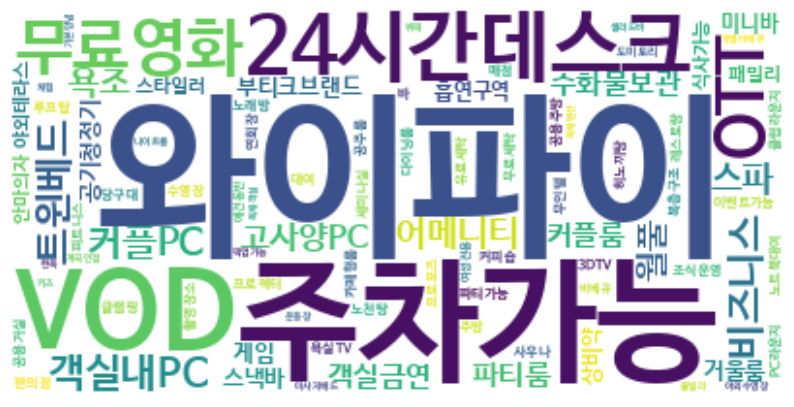

In [60]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
     